# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
SPUDS_cat=Table.read('./data/SPUDS/dmu26_XID+PACS_XMM-LSS_SPUDS_cat.fits')
SWIRE_cat=Table.read('./data/SWIRE/dmu26_XID+PACS_XMM-LSS_SWIREnSPUDS_cat.fits')

In [4]:
SPUDS_cat[0:10]

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J021748.384-055853.332,34.4515999475648,-5.9814811582976155,8.445777,19.374079,2.3371928,22.986788,34.316387,10.986022,8.005216,3.399867,0.1740641,0.20489903,0.99957657,0.99904394,2000.0,1681.0,0.0,0.0
HELP_J021747.552-055909.435,34.4481319475648,-5.985954158297615,3.5007696,8.17978,0.92465734,3.1103694,7.530303,0.89386344,8.005216,3.399867,0.1740641,0.20489903,0.9995414,0.99993587,2000.0,2000.0,0.0,0.0
HELP_J021751.319-055843.666,34.4638289475648,-5.978796158297614,6.190043,14.093257,1.788065,34.321747,45.58796,21.5545,7.590522,2.1125758,0.17923918,0.22475626,1.001321,1.0012765,2000.0,2000.0,0.0,0.0
HELP_J021751.808-055827.121,34.465864947564796,-5.974200158297615,9.052786,19.299932,2.7591174,10.928875,21.071861,3.2887888,7.590522,2.1125758,0.17923918,0.22475626,1.0006373,1.0019323,2000.0,1603.0,0.0,0.0
HELP_J021752.105-055836.873,34.4671040222776,-5.97690909477323,5.6111135,13.313595,1.5076109,12.829263,24.210432,4.050488,7.590522,2.1125758,0.17923918,0.22475626,1.0003306,1.0033044,2000.0,2000.0,0.0,0.0
HELP_J021756.415-055812.803,34.4850609475648,-5.970223158297616,19.89711,32.54174,8.703136,5.04238,11.69131,1.3826839,7.590522,2.1125758,0.17923918,0.22475626,1.001435,0.9997915,2000.0,2000.0,0.0,0.0
HELP_J021755.590-055800.544,34.4816249822776,-5.96681790477323,14.834249,27.487574,5.714874,1.987432,5.155934,0.524328,7.590522,2.1125758,0.17923918,0.22475626,1.0042573,0.9991548,2000.0,2000.0,0.0,0.0
HELP_J021754.691-055807.994,34.4778793322776,-5.96888729477323,10.951739,22.418146,3.2050204,33.43257,45.388195,22.05048,7.590522,2.1125758,0.17923918,0.22475626,0.9991605,1.0003597,2000.0,1050.0,0.0,0.0


In [5]:
SPUDS_cat

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J021748.384-055853.332,34.4515999475648,-5.9814811582976155,8.445777,19.374079,2.3371928,22.986788,34.316387,10.986022,8.005216,3.399867,0.1740641,0.20489903,0.99957657,0.99904394,2000.0,1681.0,0.0,0.0
HELP_J021747.552-055909.435,34.4481319475648,-5.985954158297615,3.5007696,8.17978,0.92465734,3.1103694,7.530303,0.89386344,8.005216,3.399867,0.1740641,0.20489903,0.9995414,0.99993587,2000.0,2000.0,0.0,0.0
HELP_J021751.319-055843.666,34.4638289475648,-5.978796158297614,6.190043,14.093257,1.788065,34.321747,45.58796,21.5545,7.590522,2.1125758,0.17923918,0.22475626,1.001321,1.0012765,2000.0,2000.0,0.0,0.0
HELP_J021751.808-055827.121,34.465864947564796,-5.974200158297615,9.052786,19.299932,2.7591174,10.928875,21.071861,3.2887888,7.590522,2.1125758,0.17923918,0.22475626,1.0006373,1.0019323,2000.0,1603.0,0.0,0.0
HELP_J021752.105-055836.873,34.4671040222776,-5.97690909477323,5.6111135,13.313595,1.5076109,12.829263,24.210432,4.050488,7.590522,2.1125758,0.17923918,0.22475626,1.0003306,1.0033044,2000.0,2000.0,0.0,0.0
HELP_J021756.415-055812.803,34.4850609475648,-5.970223158297616,19.89711,32.54174,8.703136,5.04238,11.69131,1.3826839,7.590522,2.1125758,0.17923918,0.22475626,1.001435,0.9997915,2000.0,2000.0,0.0,0.0
HELP_J021755.590-055800.544,34.4816249822776,-5.96681790477323,14.834249,27.487574,5.714874,1.987432,5.155934,0.524328,7.590522,2.1125758,0.17923918,0.22475626,1.0042573,0.9991548,2000.0,2000.0,0.0,0.0
HELP_J021754.691-055807.994,34.4778793322776,-5.96888729477323,10.951739,22.418146,3.2050204,33.43257,45.388195,22.05048,7.590522,2.1125758,0.17923918,0.22475626,0.9991605,1.0003597,2000.0,1050.0,0.0,0.0


## Look at Symmetry of PDFs to determine depth level of catalogue

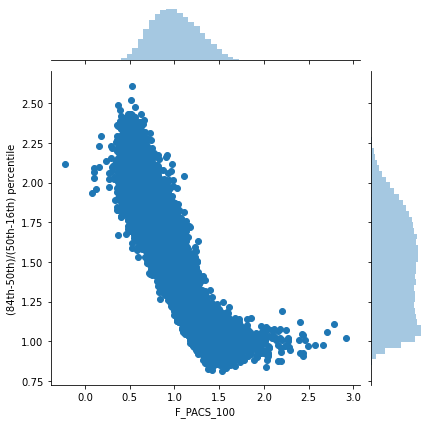

In [5]:
skew=(SPUDS_cat['FErr_PACS_100_u']-SPUDS_cat['F_PACS_100'])/(SPUDS_cat['F_PACS_100']-SPUDS_cat['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SPUDS_cat['F_PACS_100']),y=skew, kind='scatter')

g.savefig('../../data/figs/sk_PACS100_XMM-LSS_SPUDS.png', bbox='tight')
g.savefig('../../data/figs/sk_PACS100_XMM-LSS_SPUDS.pdf', bbox='tight')

For 100 $\mathrm{\mu m}$ depth is ~ 4mJy

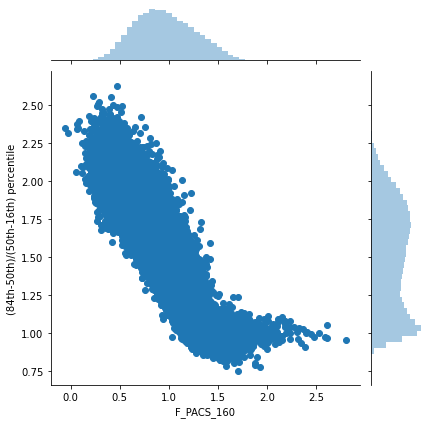

In [3]:
skew=(SPUDS_cat['FErr_PACS_160_u']-SPUDS_cat['F_PACS_160'])/(SPUDS_cat['F_PACS_160']-SPUDS_cat['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SPUDS_cat['F_PACS_160']),y=skew, kind='scatter')


g.savefig('../../data/figs/sk_PACS160_XMM-LSS_SPUDS.png', bbox='tight')
g.savefig('../../data/figs/sk_PACS160_XMM-LSS_SPUDS.pdf', bbox='tight')

For 160 $\mathrm{\mu m}$ depth is ~ 4mJy

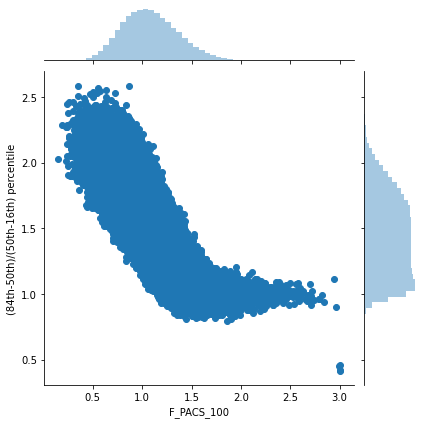

In [6]:
skew=(SWIRE_cat['FErr_PACS_100_u']-SWIRE_cat['F_PACS_100'])/(SWIRE_cat['F_PACS_100']-SWIRE_cat['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SWIRE_cat['F_PACS_100']),y=skew, kind='scatter')

g.savefig('../../data/figs/sk_PACS100_XMM-LSS_SWIRE.png', bbox='tight')
g.savefig('../../data/figs/sk_PACS100_XMM-LSS_SWIRE.pdf', bbox='tight')

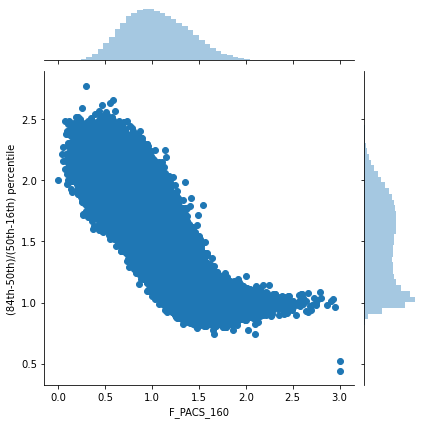

In [7]:
skew=(SWIRE_cat['FErr_PACS_160_u']-SWIRE_cat['F_PACS_160'])/(SWIRE_cat['F_PACS_160']-SWIRE_cat['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SWIRE_cat['F_PACS_160']),y=skew, kind='scatter')

g.savefig('../../data/figs/sk_PACS160_XMM-LSS_SWIRE.png', bbox='tight')
g.savefig('../../data/figs/sk_PACS160_XMM-LSS_SWIRE.pdf', bbox='tight')

## Add flag to catalogue

In [10]:
from astropy.table import Column
SPUDS_cat.add_column(Column(np.zeros(len(SPUDS_cat), dtype=bool),name='flag_PACS_100'))
SPUDS_cat.add_column(Column(np.zeros(len(SPUDS_cat), dtype=bool),name='flag_PACS_160'))



In [11]:
from astropy.table import Column
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_PACS_100'))
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_PACS_160'))


In [12]:
ind_SPUDS_100=(SPUDS_cat['Pval_res_100']>0.5) | (SPUDS_cat['F_PACS_100'] < 12.5)
ind_SPUDS_160=(SPUDS_cat['Pval_res_160']>0.5) | (SPUDS_cat['F_PACS_160'] < 17.5) 


In [13]:
ind_SWIRE_100=(SWIRE_cat['Pval_res_100']>0.5) | (SWIRE_cat['F_PACS_100'] < 12.5) | ((SWIRE_cat['FErr_PACS_100_u']-SWIRE_cat['F_PACS_100'])>150)
ind_SWIRE_160=(SWIRE_cat['Pval_res_160']>0.5) | (SWIRE_cat['F_PACS_160'] < 17.5) | ((SWIRE_cat['FErr_PACS_160_u']-SWIRE_cat['F_PACS_160'])>150)


In [14]:
print(ind_SPUDS_100.sum(),ind_SPUDS_160.sum(),len(SPUDS_cat))

46879 59043 73011


In [15]:
print(ind_SWIRE_100.sum(),ind_SWIRE_160.sum(),len(SWIRE_cat))

156940 206153 287592


In [16]:
SPUDS_cat['flag_PACS_100'][ind_SPUDS_100]=True
SPUDS_cat['flag_PACS_160'][ind_SPUDS_160]=True


In [17]:
SWIRE_cat['flag_PACS_100'][ind_SWIRE_100]=True
SWIRE_cat['flag_PACS_160'][ind_SWIRE_160]=True

In [18]:
SPUDS_cat.write('./data/SPUDS/dmu26_XID+PACS_XMM-LSS_SPUDS_cat20190215.fits', format='fits',overwrite=True)


In [19]:
SWIRE_cat.write('./data/SWIRE/dmu26_XID+PACS_XMM-LSS_SWIRE_cat20190215.fits', format='fits',overwrite=True)
